In [265]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 데이터 불러오기
raw_df1 = pd.read_csv('Data1_전처리.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생

# 복사본 만들기 
df = raw_df1.copy()



<h3>1. 결제취소건수 별 시군명 군집화</h3>

In [266]:
print(min(df['결제취소건수']))
print(max(df['결제취소건수']))

0.0
30178.0


시군 별로 결제취소건수 평균을 내어 군집화하기 전 각 시군별로 나와있는 결제건수들의 군집화 위치를 산포도로 확인

      기준연도  시군명     연령대 성별    결제건수         결제금액  결제취소건수      결제취소금액  1회평균결제금액  \
0     2023  가평군     10대  남    8409   18884.5090    46.0    487.1840    2.2457   
1     2023  가평군     10대  여    6584   17660.5435    68.0    184.1390    2.6823   
2     2023  가평군     20대  남   70363  154501.8255   728.0   3755.9999    2.1958   
3     2023  가평군     20대  여   55118  133250.6645   681.0   2799.6349    2.4176   
4     2023  가평군     30대  남  110968  268223.4965  1382.0   8447.6317    2.4171   
...    ...  ...     ... ..     ...          ...     ...         ...       ...   
1293  2021  화성시     60대  여  392006  872926.2930  3950.0  14035.3508    2.2268   
1294  2021  화성시     70대  남   93924  201672.8621   878.0   3674.4696    2.1472   
1295  2021  화성시     70대  여   94936  211313.6980   948.0   3108.2093    2.2259   
1296  2021  화성시  80대 이상  남   14820   29606.3119   128.0    342.4209    1.9977   
1297  2021  화성시  80대 이상  여   19625   44199.1314   191.0    620.8072    2.2522   

            총인구     총인구_남  

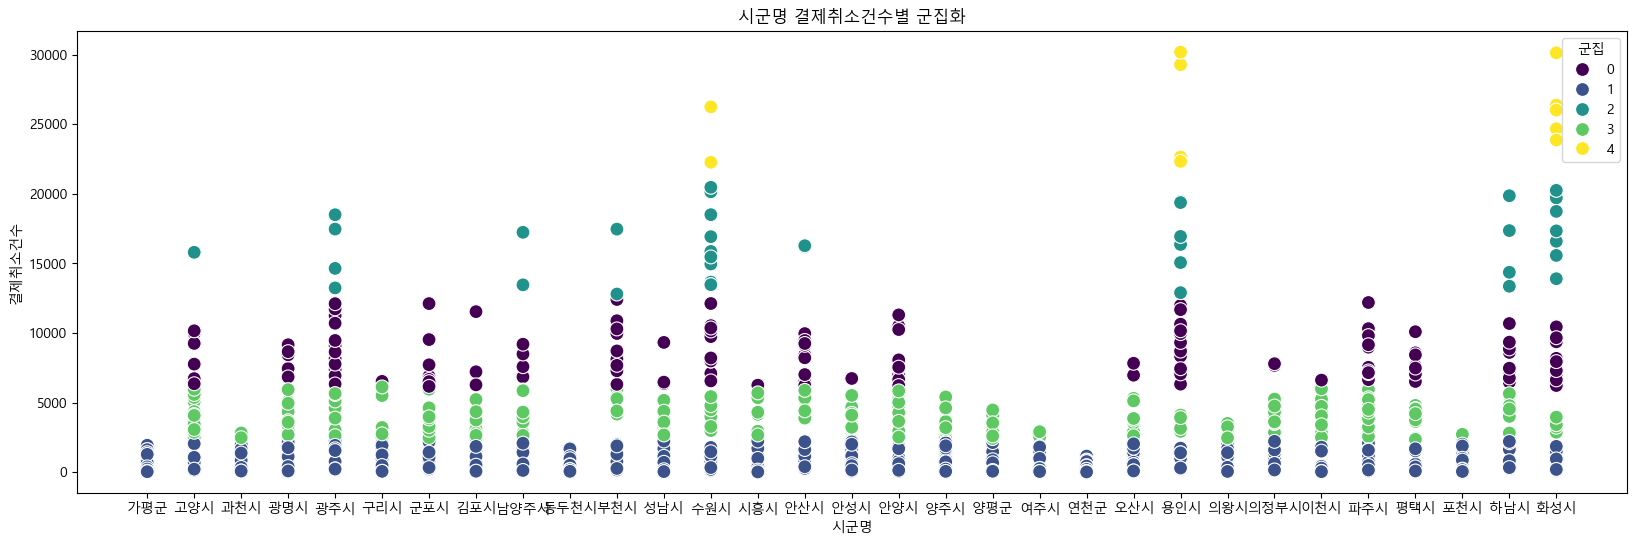

In [267]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


# 결제취소건수를 군집화하기 위해 필요한 데이터만 추출
X = df[['결제취소건수']]

# 결측값을 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 결제취소건수 정규화 (0과 1 사이의 값으로 변환)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# KMeans를 사용하여 군집화
num_clusters = 5  # 원하는 군집 수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['군집'] = kmeans.fit_predict(X_scaled)

# 결과 출력
print(df)

# 시각화
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='시군명', y='결제취소건수', hue='군집', palette='viridis', s=100)
plt.title('시군명 결제취소건수별 군집화')
plt.xlabel('시군명')
plt.ylabel('결제취소건수')
plt.legend(title='군집')
plt.show()

시군별로 결제취소건수 평균하여 하나의 값으로 반환

In [268]:
# 시군명 별로 평균 결제취소건수를 계산
avg_cancel_count = df.groupby('시군명')['결제취소건수'].mean().reset_index()

# 결과 출력
print(avg_cancel_count)

     시군명       결제취소건수
0    가평군   920.687500
1    고양시  3883.281250
2    과천시   955.395833
3    광명시  2587.666667
4    광주시  5956.354167
5    구리시  1543.125000
6    군포시  3598.781250
7    김포시  2116.031250
8   남양주시  3646.843750
9   동두천시   642.833333
10   부천시  5448.625000
11   성남시  1709.460000
12   수원시  7656.833333
13   시흥시  1585.791667
14   안산시  5214.437500
15   안성시  1817.437500
16   안양시  3665.666667
17   양주시  1454.270833
18   양평군  1760.020833
19   여주시   910.750000
20   연천군   478.750000
21   오산시  1884.781250
22   용인시  7662.562500
23   의왕시  1155.937500
24  의정부시  2215.166667
25   이천시  2326.937500
26   파주시  3349.479167
27   평택시  3385.437500
28   포천시   980.291667
29   하남시  5480.593750
30   화성시  8009.125000


시군별 군집화 실행

   군집                                                시군명
0   0  [광명시, 구리시, 김포시, 성남시, 시흥시, 안성시, 양주시, 양평군, 오산시, ...
1   1                               [광주시, 부천시, 안산시, 하남시]
2   2                    [고양시, 군포시, 남양주시, 안양시, 파주시, 평택시]
3   3                                    [수원시, 용인시, 화성시]
4   4               [가평군, 과천시, 동두천시, 여주시, 연천군, 의왕시, 포천시]


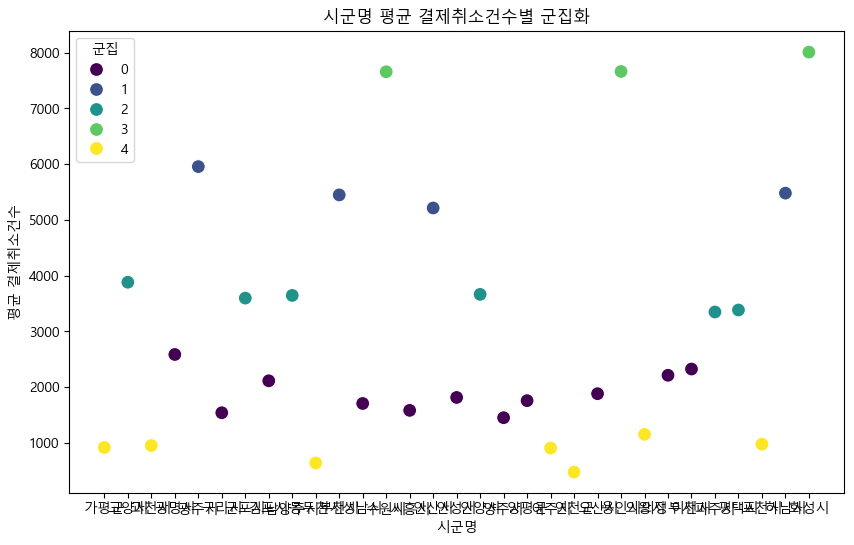

In [269]:

# 시군명 별로 평균 결제취소건수를 계산
avg_cancel_count = df.groupby('시군명')['결제취소건수'].mean().reset_index()

# 결제취소건수 정규화 (0과 1 사이의 값으로 변환)
scaler = MinMaxScaler()
avg_cancel_count['결제취소건수_scaled'] = scaler.fit_transform(avg_cancel_count[['결제취소건수']])

# KMeans를 사용하여 군집화
num_clusters = 5  # 원하는 군집 수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
avg_cancel_count['군집'] = kmeans.fit_predict(avg_cancel_count[['결제취소건수_scaled']])

# 각 군집별 시군명을 묶어서 출력
grouped = avg_cancel_count.groupby('군집')['시군명'].apply(list).reset_index()
print(grouped)

## 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_cancel_count, x='시군명', y='결제취소건수', hue='군집', palette='viridis', s=100)
plt.title('시군명 평균 결제취소건수별 군집화')
plt.xlabel('시군명')
plt.ylabel('평균 결제취소건수')
plt.legend(title='군집')
plt.show()

** 참고로 위는 군집의 순서정렬 전 말그대로 군집화만 진행한 것이기 때문에 군집0,1,2,3,4 는 다음 그래프에서 순서 정렬 됨

정렬된 군집별 결제취소건수 범위: 

군집 0의 결제취소건수 범위: 0.0 - 3453.0

군집 1의 결제취소건수 범위: 3493.0 - 12404.0

군집 2의 결제취소건수 범위: 12797.0 - 30639.0

군집 3의 결제취소건수 범위: 40202.0 - 71239.0

군집 4의 결제취소건수 범위: 85449.0 - 128058.0



=> 군집화를 실행한 그래프 출력

   군집                                                시군명
0   0  [광명시, 구리시, 김포시, 성남시, 시흥시, 안성시, 양주시, 양평군, 오산시, ...
1   1                               [광주시, 부천시, 안산시, 하남시]
2   2                    [고양시, 군포시, 남양주시, 안양시, 파주시, 평택시]
3   3                                    [수원시, 용인시, 화성시]
4   4               [가평군, 과천시, 동두천시, 여주시, 연천군, 의왕시, 포천시]


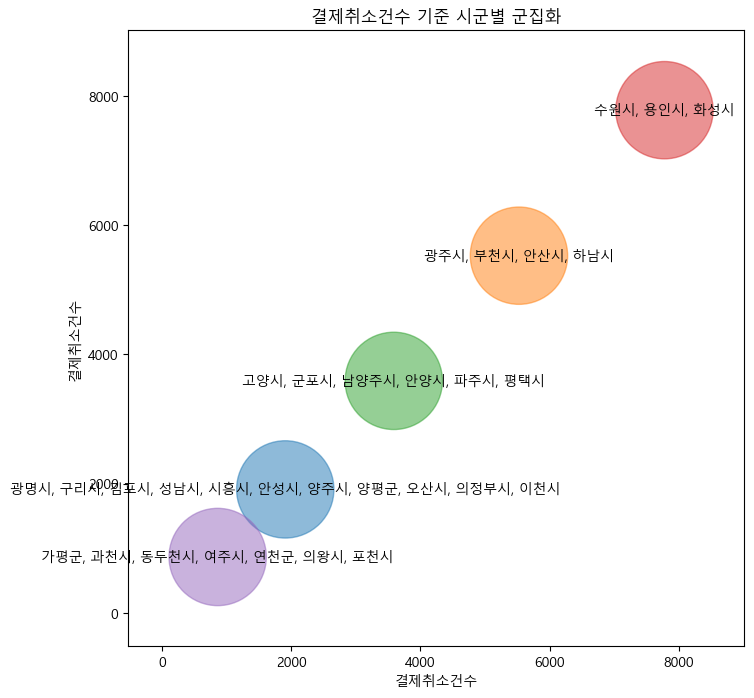

In [270]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 시군명 별로 평균 결제취소건수를 계산
avg_cancel_count = df.groupby('시군명')['결제취소건수'].mean().reset_index()

# KMeans를 사용하여 군집화
num_clusters = 5  # 원하는 군집 수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
avg_cancel_count['군집'] = kmeans.fit_predict(avg_cancel_count[['결제취소건수']])

# 각 군집별 시군명을 묶어서 출력
grouped = avg_cancel_count.groupby('군집')['시군명'].apply(list).reset_index()
print(grouped)

# 시각화
plt.figure(figsize=(20, 8))

# 원의 중심 좌표 설정
centers = kmeans.cluster_centers_

# 원의 반지름 설정
radius = 0.1  # 원의 반지름을 조정합니다.

# 군집의 결제취소건수 값으로 좌표를 설정합니다.
for i in range(num_clusters):
    cluster_points = avg_cancel_count[avg_cancel_count['군집'] == i]
    cluster_center = centers[i, 0]

    # 원 그리기
    circle = plt.Circle((cluster_center, cluster_center), radius * (avg_cancel_count['결제취소건수'].max() - avg_cancel_count['결제취소건수'].min()), color='C'+str(i), alpha=0.5)
    plt.gca().add_patch(circle)

    # 원 안에 텍스트 추가
    texts = ', '.join(cluster_points['시군명'])
    plt.text(cluster_center, cluster_center, texts, horizontalalignment='center', verticalalignment='center')

# 축 설정
plt.xlim(avg_cancel_count['결제취소건수'].min() - 1000, avg_cancel_count['결제취소건수'].max() + 1000)
plt.ylim(avg_cancel_count['결제취소건수'].min() - 1000, avg_cancel_count['결제취소건수'].max() + 1000)
plt.xlabel('결제취소건수')
plt.ylabel('결제취소건수')
plt.title('결제취소건수 기준 시군별 군집화')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


<hr>

<h3>2. 총인구수 별 외국인 비율 군집화</h3>

외국인 비율에 따라 높음,중간,낮음으로 군집화를 하기 위한 기준 값 설정하고자 필요 계산값을 도출

In [271]:
import pandas as pd

# 외국인 비율 계산
df['외국인비율'] = df['등록외국인_총인구'] / df['총인구']


# 외국인 비율의 통계 값 출력
mean_ratio = df['외국인비율'].mean()
median_ratio = df['외국인비율'].median()
std_ratio = df['외국인비율'].std()
max_ratio = df['외국인비율'].max()

print(f"평균 외국인 비율: {mean_ratio:.2%}")
print(f"중앙값 외국인 비율: {median_ratio:.2%}")
print(f"표준편차: {std_ratio:.2%}")
print(f"최고 외국인 비율: {max_ratio:.2%}")


# 외국인 비율이 높은 기준 설정 (예: 평균 + 1표준편차)
high_foreign_ratio_threshold = mean_ratio + std_ratio
print(f"높은 외국인 비율 기준: {high_foreign_ratio_threshold:.2%}")


평균 외국인 비율: 3.18%
중앙값 외국인 비율: 3.02%
표준편차: 2.33%
최고 외국인 비율: 9.74%
높은 외국인 비율 기준: 5.51%


시군별로 총인구 대비 등록 외국인 거주 비율 도출 & 기준값 대비 높음,중간,낮음으로 군집 설정 

In [272]:
import pandas as pd
import matplotlib.pyplot as plt


# 중복된 시군명 제거 (마지막 값을 남기고 제거)
df = df.drop_duplicates(subset=['시군명'], keep='last')

# 외국인 비율 계산
df['외국인비율'] = df['등록외국인_총인구'] / df['총인구']

# 외국인 비율의 통계 값 계산
mean_ratio = df['외국인비율'].mean()
std_ratio = df['외국인비율'].std()

# 외국인 비율 군집 기준 설정
high_threshold = mean_ratio + std_ratio
low_threshold = mean_ratio - std_ratio

# 군집화
def classify_ratio(ratio):
    if ratio > high_threshold:
        return '높음'
    elif ratio < low_threshold:
        return '낮음'
    else:
        return '중간'

df['군집'] = df['외국인비율'].apply(classify_ratio)

# 결과 출력
print(df[['시군명', '외국인비율', '군집']])


       시군명     외국인비율  군집
31     가평군  0.019487  중간
63     고양시  0.012260  중간
111    과천시  0.003006  낮음
159    광명시  0.010029  중간
207    광주시  0.034151  중간
255    구리시  0.007941  낮음
287    군포시  0.022019  중간
319    김포시  0.047517  중간
351   남양주시  0.011833  중간
399   동두천시  0.043654  중간
431    부천시  0.033509  중간
481    성남시  0.017761  중간
529    수원시  0.030174  중간
577    시흥시  0.069546  높음
609    안산시  0.077423  높음
657    안성시  0.070468  높음
705    안양시  0.011709  중간
753    양주시  0.033104  중간
801    양평군  0.012883  중간
833    여주시  0.040330  중간
881    연천군  0.034244  중간
913    오산시  0.040919  중간
961    용인시  0.017792  중간
1009   의왕시  0.006817  낮음
1057  의정부시  0.013461  중간
1089   이천시  0.042636  중간
1137   파주시  0.028207  중간
1169   평택시  0.048885  중간
1217   포천시  0.097356  높음
1249   하남시  0.007877  낮음
1297   화성시  0.048174  중간


=> 위 값을 토대로 시각화 도출

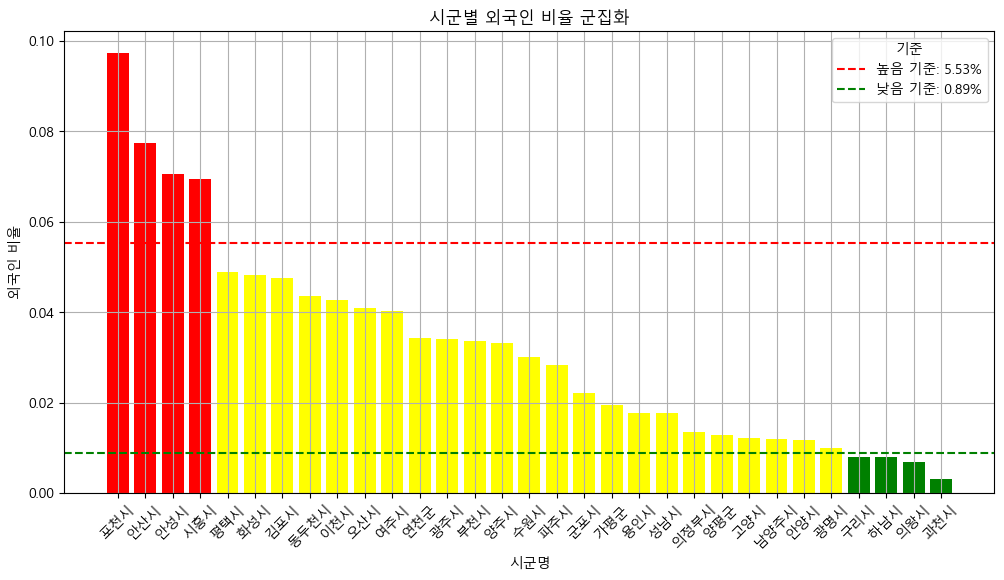

In [273]:
import pandas as pd
import matplotlib.pyplot as plt

# 중복된 시군명 제거 (마지막 값을 남기고 제거)
df = df.drop_duplicates(subset=['시군명'], keep='last')

# 외국인 비율 계산
df['외국인비율'] = df['등록외국인_총인구'] / df['총인구']

# 외국인 비율의 통계 값 계산
mean_ratio = df['외국인비율'].mean()
std_ratio = df['외국인비율'].std()

# 외국인 비율 군집 기준 설정
high_threshold = mean_ratio + std_ratio
low_threshold = mean_ratio - std_ratio

# 군집화
def classify_ratio(ratio):
    if ratio > high_threshold:
        return '높음'
    elif ratio < low_threshold:
        return '낮음'
    else:
        return '중간'

df['군집'] = df['외국인비율'].apply(classify_ratio)

# 외국인 비율을 기준으로 내림차순 정렬
df_sorted = df.sort_values(by='외국인비율', ascending=False)

# 군집에 따라 색상 지정
colors = {'높음': 'red', '중간': 'yellow', '낮음': 'green'}
df_sorted['color'] = df_sorted['군집'].apply(lambda x: colors[x])

# 시각화
plt.figure(figsize=(12, 6))

plt.bar(df_sorted['시군명'], df_sorted['외국인비율'], color=df_sorted['color'])

# 기준선 추가
plt.axhline(y=high_threshold, color='r', linestyle='--', label=f'높음 기준: {high_threshold:.2%}')
plt.axhline(y=low_threshold, color='g', linestyle='--', label=f'낮음 기준: {low_threshold:.2%}')

plt.xlabel('시군명')
plt.ylabel('외국인 비율')
plt.title('시군별 외국인 비율 군집화')
plt.legend(title='기준')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


=> 원 그래프로도 도출해내봄

C:\Users\윤재희\AppData\Local\Temp\ipykernel_27352\1937864301.py:53: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((center_x, center_x), radius, color=colors[cluster], alpha=0.5, edgecolor='black')
C:\Users\윤재희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


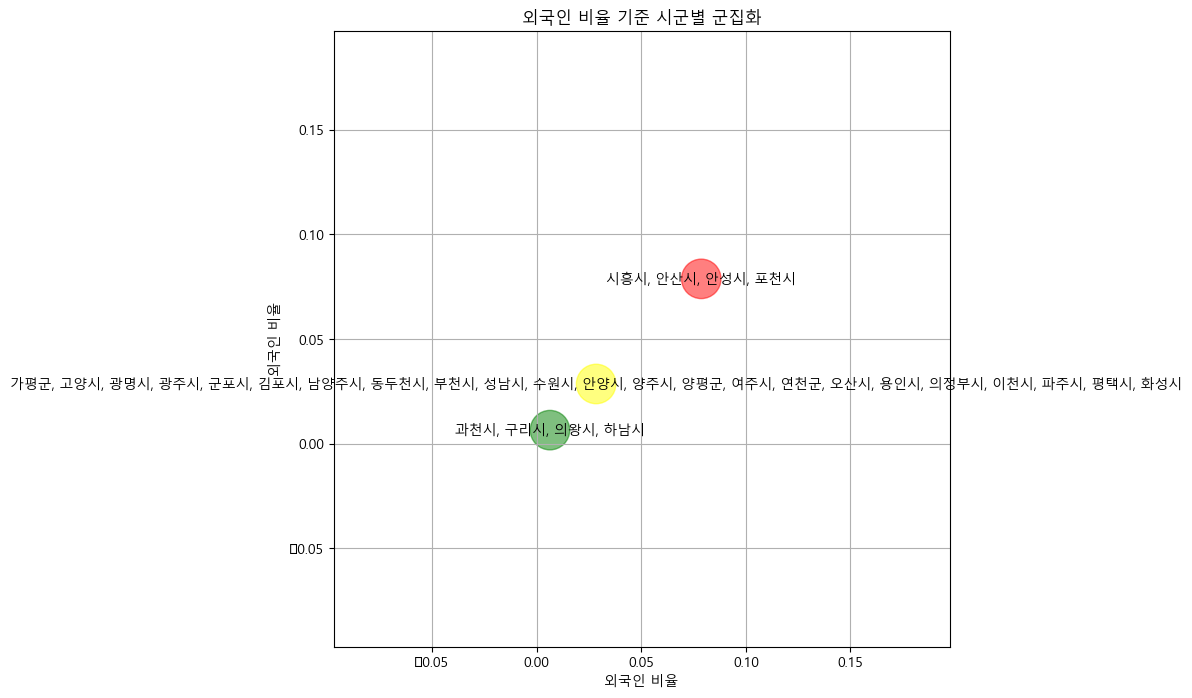

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle


# 중복된 시군명 제거 (마지막 값을 남기고 제거)
df = df.drop_duplicates(subset=['시군명'], keep='last')

# 외국인 비율 계산
df['외국인비율'] = df['등록외국인_총인구'] / df['총인구']

# 외국인 비율의 통계 값 계산
mean_ratio = df['외국인비율'].mean()
std_ratio = df['외국인비율'].std()

# 외국인 비율 군집 기준 설정
high_threshold = mean_ratio + std_ratio
low_threshold = mean_ratio - std_ratio

# 군집화
def classify_ratio(ratio):
    if ratio > high_threshold:
        return '높음'
    elif ratio < low_threshold:
        return '낮음'
    else:
        return '중간'

df['군집'] = df['외국인비율'].apply(classify_ratio)

# 군집에 따라 색상 지정
colors = {'높음': 'red', '중간': 'yellow', '낮음': 'green'}
df['color'] = df['군집'].apply(lambda x: colors[x])

# 시각화
plt.figure(figsize=(14, 8))

# 원의 반지름을 외국인 비율의 범위로 설정
radius_scale = 0.1
min_ratio = df['외국인비율'].min()
max_ratio = df['외국인비율'].max()

# 군집별 원 그리기
for cluster in df['군집'].unique():
    cluster_points = df[df['군집'] == cluster]
    # 군집의 중심 좌표 설정
    center_x = cluster_points['외국인비율'].mean()
    
    # 원의 반지름 설정
    radius = radius_scale * (max_ratio - min_ratio)
    
    # 원 그리기
    circle = Circle((center_x, center_x), radius, color=colors[cluster], alpha=0.5, edgecolor='black')
    plt.gca().add_patch(circle)
    
    # 원 안에 시군명 추가
    texts = ', '.join(cluster_points['시군명'])
    plt.text(center_x, center_x, texts, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# 축 설정
plt.xlim(min_ratio - radius_scale, max_ratio + radius_scale)
plt.ylim(min_ratio - radius_scale, max_ratio + radius_scale)
plt.xlabel('외국인 비율')
plt.ylabel('외국인 비율')
plt.title('외국인 비율 기준 시군별 군집화')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


=> 누운 막대로도 해봤어요..

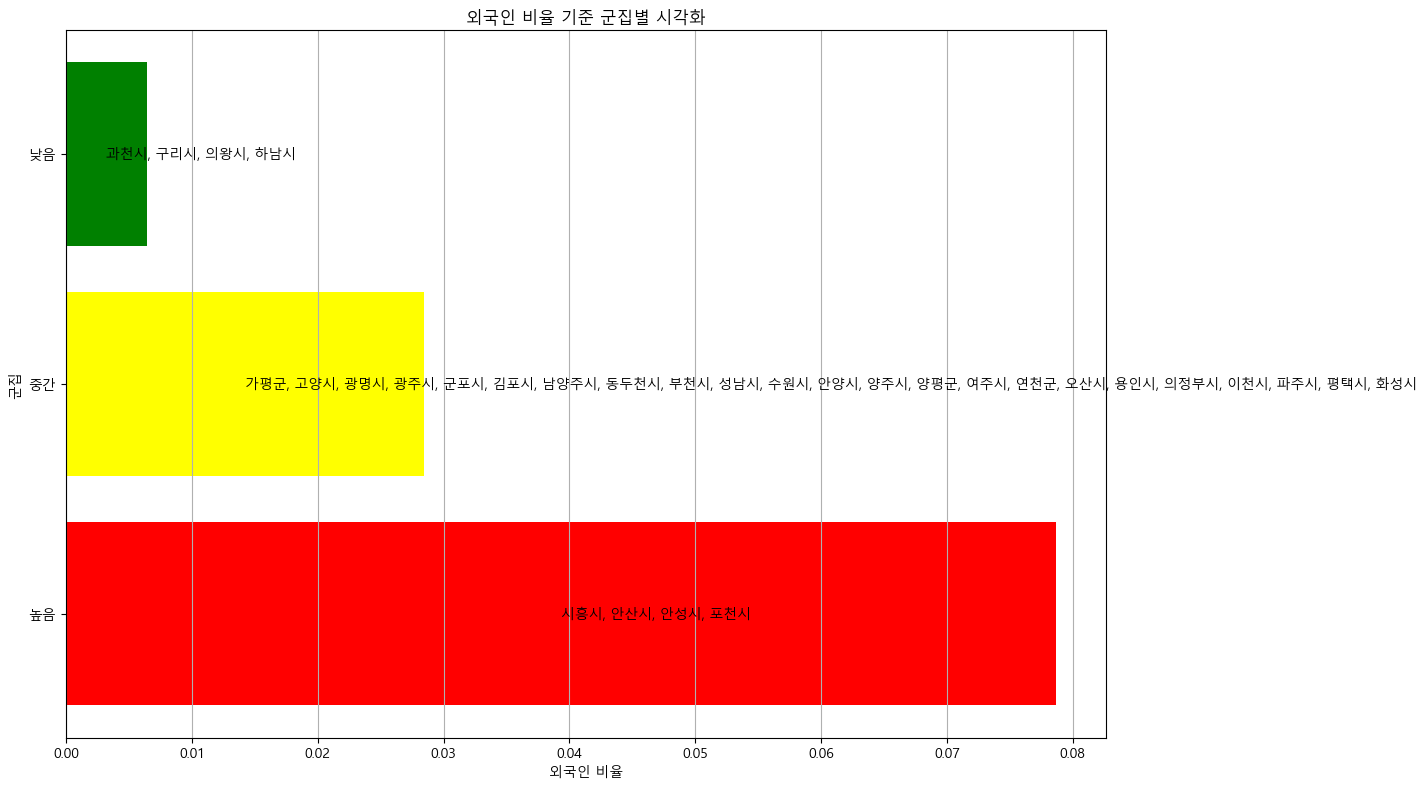

In [290]:
import pandas as pd
import matplotlib.pyplot as plt

# 중복된 시군명 제거 (마지막 값을 남기고 제거)
df = df.drop_duplicates(subset=['시군명'], keep='last')

# 외국인 비율 계산
df['외국인비율'] = df['등록외국인_총인구'] / df['총인구']

# 외국인 비율의 통계 값 계산
mean_ratio = df['외국인비율'].mean()
std_ratio = df['외국인비율'].std()

# 외국인 비율 군집 기준 설정
high_threshold = mean_ratio + std_ratio
low_threshold = mean_ratio - std_ratio

# 군집화
def classify_ratio(ratio):
    if ratio > high_threshold:
        return '높음'
    elif ratio < low_threshold:
        return '낮음'
    else:
        return '중간'

df['군집'] = df['외국인비율'].apply(classify_ratio)

# 군집별 평균 비율 계산
cluster_means = df.groupby('군집')['외국인비율'].mean().reset_index()
cluster_means.sort_values(by='외국인비율', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(14, 8))

# 군집별로 막대 그리기
for idx, row in cluster_means.iterrows():
    cluster = row['군집']
    mean_ratio = row['외국인비율']
    
    # 해당 군집의 시군명
    cluster_points = df[df['군집'] == cluster]
    texts = cluster_points['시군명'].tolist()
    text_str = ', '.join(texts)  # 시군명을 가로로 나열하여 표시
    
    # 막대 그래프 추가
    plt.barh(cluster, mean_ratio, color={'높음': 'red', '중간': 'yellow', '낮음': 'green'}[cluster])
    
    # 막대 안에 시군명 추가 (가로로)
    plt.text(mean_ratio * 0.5, cluster, text_str, va='center', ha='left', fontsize=10, color='black')

# 축 설정
plt.xlabel('외국인 비율')
plt.ylabel('군집')
plt.title('외국인 비율 기준 군집별 시각화')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()



<hr>

<h3>3. 총 인구수 대비 결제 건수 군집화 </h3>

막대그래프를 이용해 총 인구수 대비 결제 건수 비율을 내림차순으로 시군별 정렬

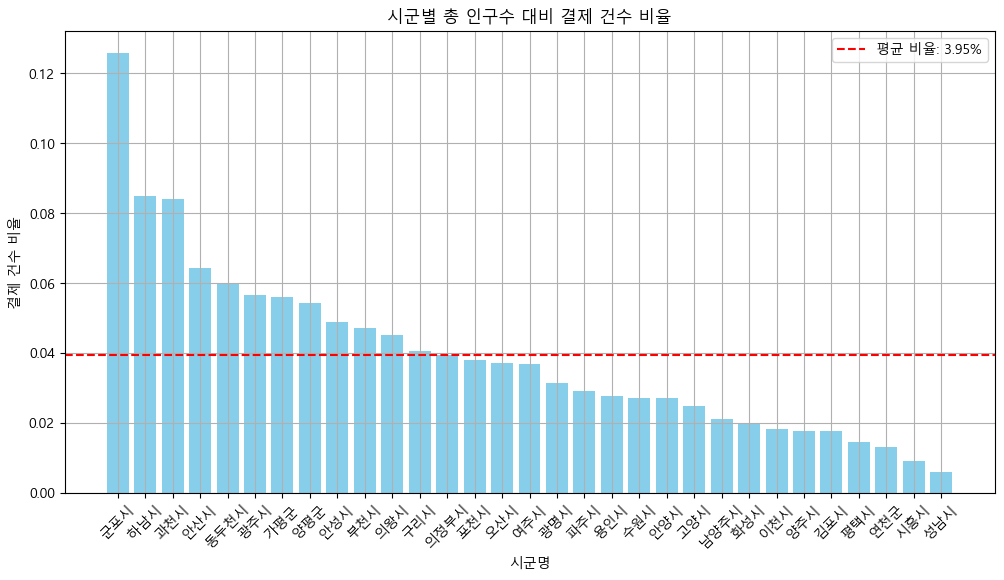

In [274]:
import pandas as pd
import matplotlib.pyplot as plt


# 시군명 별 총 결제건수 계산
df_total = df.groupby('시군명').agg({'결제건수': 'sum', '총인구': 'mean'}).reset_index()

# 총 결제건수 대비 총 인구수 비율 계산
df_total['결제건수_비율'] = df_total['결제건수'] / df_total['총인구']

# 데이터프레임을 결제 건수 비율 기준으로 내림차순 정렬
df_sorted = df_total.sort_values(by='결제건수_비율', ascending=False)

# 시각화
plt.figure(figsize=(12, 6))

# 막대그래프 그리기
plt.bar(df_sorted['시군명'], df_sorted['결제건수_비율'], color='skyblue')

# 평균 비율 기준선 추가
mean_ratio = df_sorted['결제건수_비율'].mean()
plt.axhline(y=mean_ratio, color='r', linestyle='--', label=f'평균 비율: {mean_ratio:.2%}')

plt.xlabel('시군명')
plt.ylabel('결제 건수 비율')
plt.title('시군별 총 인구수 대비 결제 건수 비율')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


2번 군집화처럼 3개의 군집으로 나눠보고자 기준 설정

In [275]:
# 비율의 통계 값 계산
mean_ratio = df_total['결제건수_비율'].mean()
std_ratio = df_total['결제건수_비율'].std()

# 군집화 기준 설정
high_threshold = mean_ratio + std_ratio
low_threshold = mean_ratio - std_ratio

# 군집화
def classify_ratio(ratio):
    if ratio > high_threshold:
        return '높음'
    elif ratio < low_threshold:
        return '낮음'
    else:
        return '중간'

df_total['군집'] = df_total['결제건수_비율'].apply(classify_ratio)


높음 중간 낮음을 기준으로 군집을 나누어봄

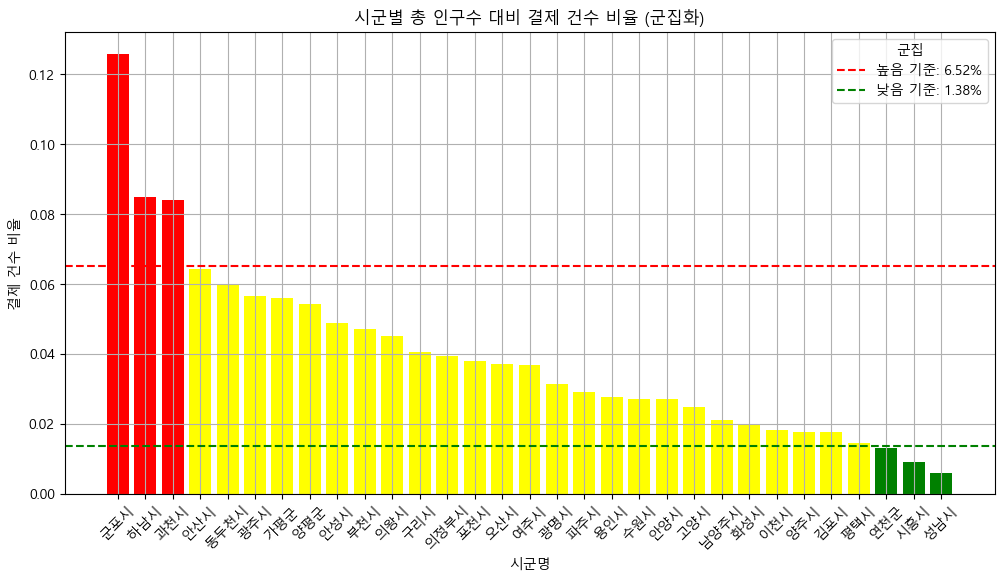

In [276]:
import pandas as pd
import matplotlib.pyplot as plt


# 시군명 별 총 결제건수 계산
df_total = df.groupby('시군명').agg({'결제건수': 'sum', '총인구': 'mean'}).reset_index()

# 총 결제건수 대비 총 인구수 비율 계산
df_total['결제건수_비율'] = df_total['결제건수'] / df_total['총인구']

# 비율의 통계 값 계산
mean_ratio = df_total['결제건수_비율'].mean()
std_ratio = df_total['결제건수_비율'].std()

# 군집화 기준 설정
high_threshold = mean_ratio + std_ratio
low_threshold = mean_ratio - std_ratio

# 군집화
def classify_ratio(ratio):
    if ratio > high_threshold:
        return '높음'
    elif ratio < low_threshold:
        return '낮음'
    else:
        return '중간'

df_total['군집'] = df_total['결제건수_비율'].apply(classify_ratio)

# 데이터프레임을 결제 건수 비율 기준으로 내림차순 정렬
df_sorted = df_total.sort_values(by='결제건수_비율', ascending=False)

# 군집에 따라 색상 지정
colors = {'높음': 'red', '중간': 'yellow', '낮음': 'green'}
df_sorted['color'] = df_sorted['군집'].apply(lambda x: colors[x])

# 시각화
plt.figure(figsize=(12, 6))

plt.bar(df_sorted['시군명'], df_sorted['결제건수_비율'], color=df_sorted['color'])

# 기준선 추가
plt.axhline(y=high_threshold, color='r', linestyle='--', label=f'높음 기준: {high_threshold:.2%}')
plt.axhline(y=low_threshold, color='g', linestyle='--', label=f'낮음 기준: {low_threshold:.2%}')

plt.xlabel('시군명')
plt.ylabel('결제 건수 비율')
plt.title('시군별 총 인구수 대비 결제 건수 비율 (군집화)')
plt.legend(title='군집')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<hr>

<h3>4.  월별 충전액 대비 월별 사용액 군집화 </h3>

In [277]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 데이터 불러오기
raw_df2 = pd.read_csv('Data2_전처리.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생

# 복사본 만들기 
df2 = raw_df2.copy()

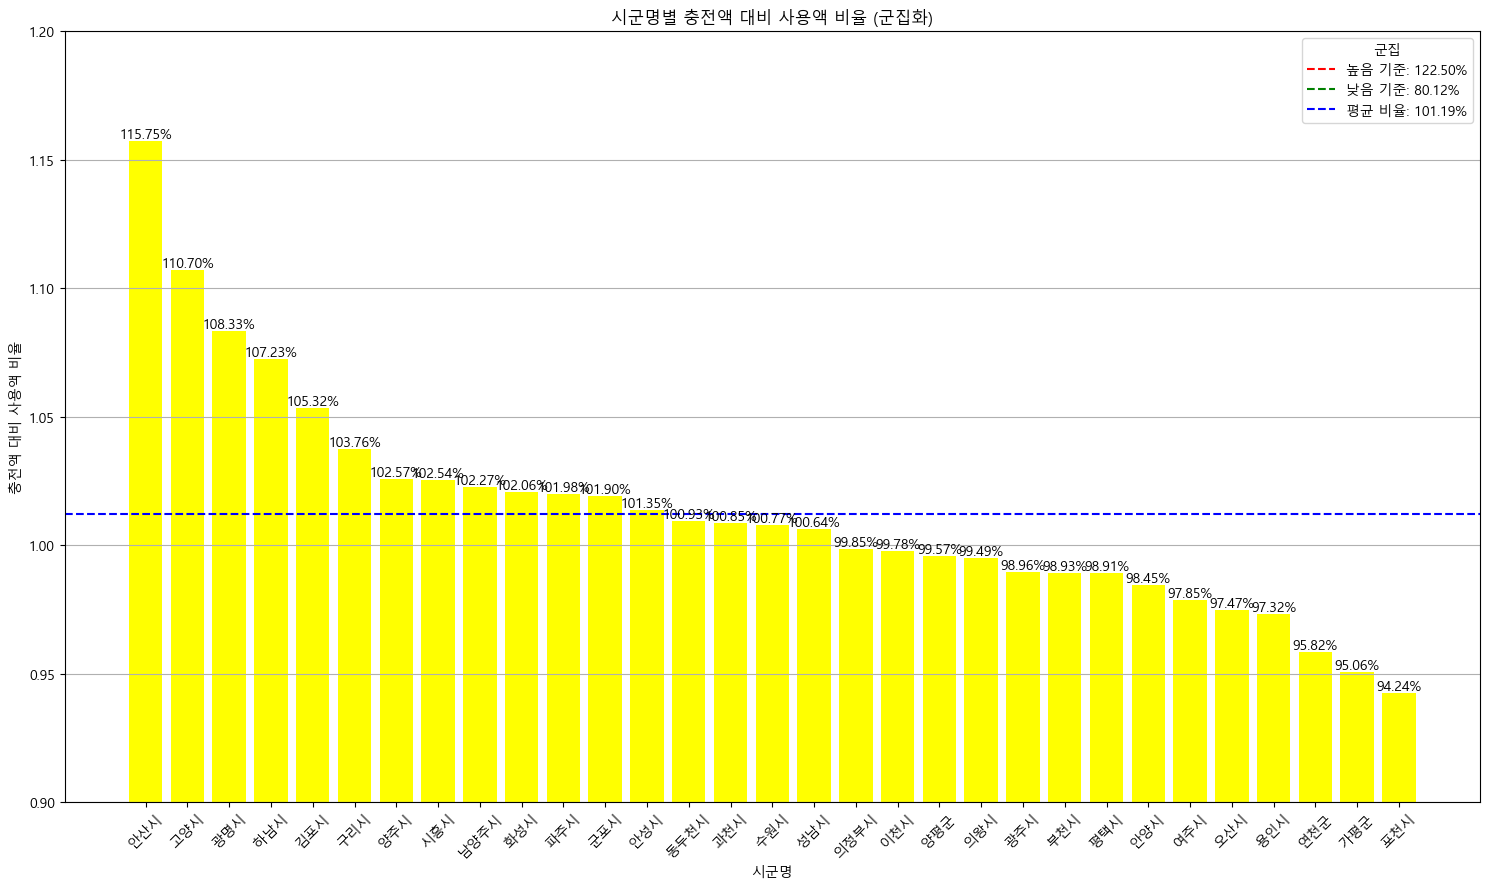

In [278]:
import pandas as pd
import matplotlib.pyplot as plt

# 충전액 대비 사용액 비율 계산
df2['충전액 대비 사용액 비율'] = df2['월별사용액(만원)'] / df2['월별충전액(만원)']

# 시군명별 충전액 대비 사용액 비율의 평균과 표준편차 계산
df_summary = df2.groupby('시군명')['충전액 대비 사용액 비율'].agg(['mean', 'std']).reset_index()
df_summary.rename(columns={'mean': '평균 비율', 'std': '표준편차 비율'}, inplace=True)

# 비율의 통계 값 계산
overall_mean_ratio = df_summary['평균 비율'].mean()
overall_std_ratio = df_summary['표준편차 비율'].mean()

# 군집화 기준 설정
high_threshold = overall_mean_ratio + overall_std_ratio
low_threshold = overall_mean_ratio - overall_std_ratio

# 군집화
def classify_ratio(ratio):
    if ratio > high_threshold:
        return '높음'
    elif ratio < low_threshold:
        return '낮음'
    else:
        return '중간'

df_summary['군집'] = df_summary['평균 비율'].apply(classify_ratio)

# 데이터프레임을 결제 건수 비율 기준으로 내림차순 정렬
df_summary = df_summary.sort_values(by='평균 비율', ascending=False)

# 군집에 따라 색상 지정
colors = {'높음': 'red', '중간': 'yellow', '낮음': 'green'}
df_summary['color'] = df_summary['군집'].apply(lambda x: colors[x])

# 막대그래프 생성
plt.figure(figsize=(15, 9))

# 막대그래프 플롯
bars = plt.bar(df_summary['시군명'], df_summary['평균 비율'], color=df_summary['color'])

# 기준선 추가
plt.axhline(y=high_threshold, color='r', linestyle='--', label=f'높음 기준: {high_threshold:.2%}')
plt.axhline(y=low_threshold, color='g', linestyle='--', label=f'낮음 기준: {low_threshold:.2%}')
mean_ratio = df2['충전액 대비 사용액 비율'].mean()
plt.axhline(y=mean_ratio, color='b', linestyle='--', label=f'평균 비율: {mean_ratio:.2%}')

# 막대에 레이블 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', ha='center', va='bottom')

plt.xlabel('시군명')
plt.ylabel('충전액 대비 사용액 비율')
plt.title('시군명별 충전액 대비 사용액 비율 (군집화)')
plt.ylim(0.9,1.2)
plt.legend(title='군집')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



높음 군집 데이터:
     시군명     월별충전액(만원)     월별사용액(만원)  충전액 대비 사용액 비율  군집
7    김포시  1.179054e+06  1.231808e+06       1.044743  높음
29   하남시  1.446237e+06  1.475866e+06       1.020487  높음
14   안산시  1.925958e+06  1.962192e+06       1.018814  높음
3    광명시  1.037842e+06  1.053499e+06       1.015086  높음
8   남양주시  1.934534e+06  1.952832e+06       1.009459  높음
13   시흥시  2.053477e+06  2.054931e+06       1.000708  높음
26   파주시  1.384281e+06  1.381260e+06       0.997817  높음
6    군포시  1.238196e+06  1.235321e+06       0.997678  높음
30   화성시  3.248261e+06  3.226706e+06       0.993364  높음
24  의정부시  8.604839e+05  8.545086e+05       0.993056  높음
1    고양시  1.675200e+06  1.662899e+06       0.992657  높음
27   평택시  1.473731e+06  1.446384e+06       0.981443  높음
9   동두천시  2.084534e+05  2.045205e+05       0.981133  높음
23   의왕시  3.804226e+05  3.729900e+05       0.980462  높음
12   수원시  2.900300e+06  2.840465e+06       0.979370  높음
10   부천시  2.374457e+06  2.325405e+06       0.979342  높음
15   안성시  6.739510e+05  6.589727e+05 

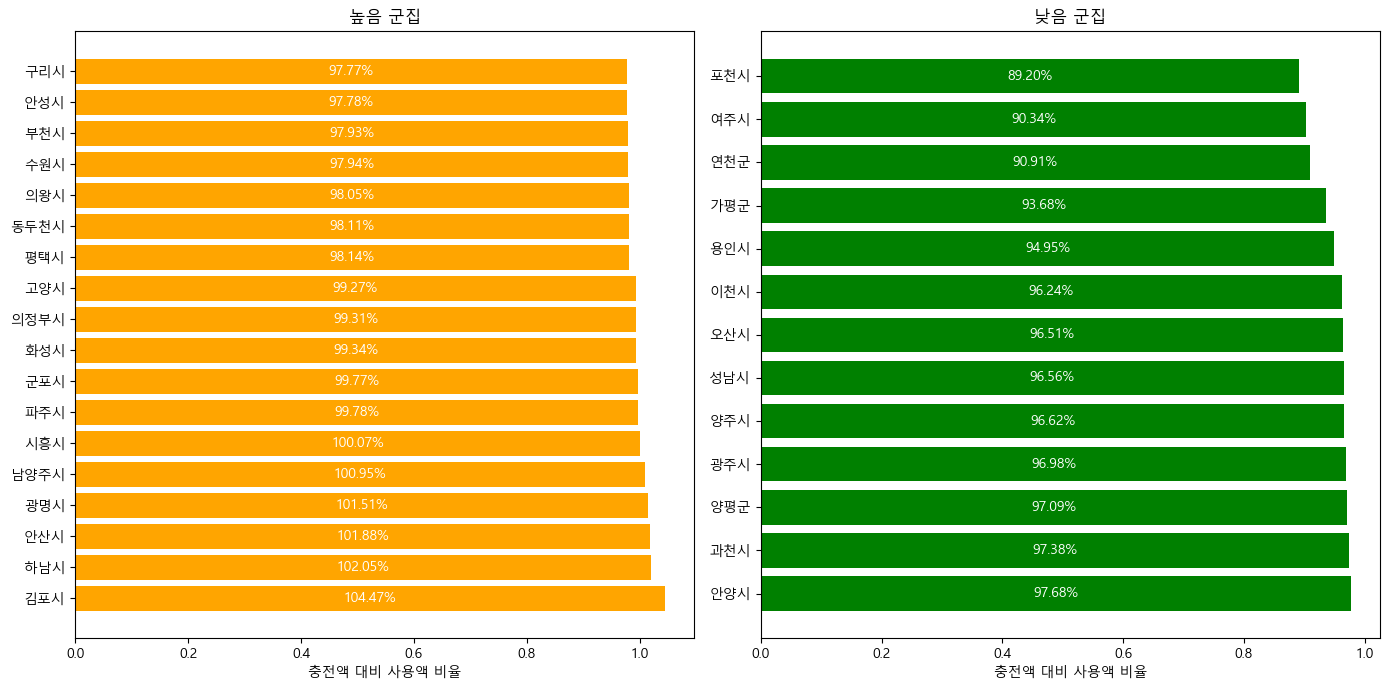

In [280]:
import pandas as pd
import matplotlib.pyplot as plt


# 중복된 시군명을 제거하고 평균값 계산
df2 = df2.groupby('시군명', as_index=False).agg({
    '월별충전액(만원)': 'mean',
    '월별사용액(만원)': 'mean'
})

# 충전액 대비 사용액 비율 계산
df2['충전액 대비 사용액 비율'] = df2['월별사용액(만원)'] / df2['월별충전액(만원)']

# 시군명별 충전액 대비 사용액 비율의 평균 계산
mean_ratio = df2['충전액 대비 사용액 비율'].mean()

# 평균 비율을 기준으로 군집화
df2['군집'] = df2['충전액 대비 사용액 비율'].apply(lambda x: '높음' if x > mean_ratio else '낮음')

# 군집별 데이터 준비 및 내림차순 정렬
high_group = df2[df2['군집'] == '높음'].sort_values(by='충전액 대비 사용액 비율', ascending=False)
low_group = df2[df2['군집'] == '낮음'].sort_values(by='충전액 대비 사용액 비율', ascending=False)

# 군집별 시군명 및 비율
high_labels = high_group['시군명']
high_sizes = high_group['충전액 대비 사용액 비율']
low_labels = low_group['시군명']
low_sizes = low_group['충전액 대비 사용액 비율']

# 데이터 확인
print("높음 군집 데이터:")
print(high_group)
print("낮음 군집 데이터:")
print(low_group)

# 누운 막대 그래프 생성
plt.figure(figsize=(14, 7))

# '높음' 군집 누운 막대 그래프
plt.subplot(1, 2, 1)
bars_high = plt.barh(high_labels, high_sizes, color='orange')
plt.xlabel('충전액 대비 사용액 비율')
plt.title('높음 군집')

# '낮음' 군집 누운 막대 그래프
plt.subplot(1, 2, 2)
bars_low = plt.barh(low_labels, low_sizes, color='green')
plt.xlabel('충전액 대비 사용액 비율')
plt.title('낮음 군집')

# 막대 안에 비율만 추가
def add_labels(bars, sizes):
    for bar, size in zip(bars, sizes):
        width = bar.get_width()
        # 비율을 막대의 중앙에 표시
        plt.text(width / 2, bar.get_y() + bar.get_height() / 2, 
                 f'{size:.2%}', va='center', ha='center', color='white', fontsize=10)

# 군집별 막대에 비율 레이블 추가
plt.subplot(1, 2, 1)  # '높음' 군집
add_labels(bars_high, high_sizes)

plt.subplot(1, 2, 2)  # '낮음' 군집
add_labels(bars_low, low_sizes)

plt.tight_layout()
plt.show()
